In [1]:
#Import packages
import numpy as np
import torch
import scipy.interpolate
import math
from scipy.integrate import quad
import Krylov
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import tikzplotlib as tikz

In [2]:
#Functions to generate variables
def absorbing(L,boundarywidth,a,x):
    b = [[0,0],[10,0],[12.480605508822585, -0.025158792783650075],
    [13.245010702282347, -0.03257908601267223],
    [14.009483537430615, -0.026268116475135272],
    [14.77405107094279, -0.000733379064415729],
    [15.538665953636922, 0.03441324228289511],
    [16.303328185513003, 0.07917174756679768],
    [17.067983653220235, 0.12255712657404416],
    [17.83243619586195, 0.12474871728161308],
    [18.596604643411943, 0.06926900436963357],
    [19.360502524207917, -0.0411357596085824],
    [20.12440040500389, -0.1515405235867986],
    [20.88860943756699, -0.19878147883884245],
    [21.653305490287323, -0.14715734217166054],
    [22.41842768564524, -0.009026250075155673],
    [23.183536352665456, 0.12635858946803724],
    [23.948266226230043, 0.1848483575184987],
    [24.71245496628659, 0.1334880234364868],
    [25.47625814871866, 0.0038594915850880263],
    [26.24013573700808, -0.11066465122309577],
    [27.292474204857513, -0.11267650830120823],
    [28.117179064690163, 0.028656934591100747],
    [28.88222009002188, 0.15031051136773455],
    [29.646794387702897, 0.17721837505511018],
    [30.410800495200483, 0.08878363150338853],
    [31.174508979268644, -0.06006866822119328],
    [31.938555671779326, -0.1402646541129795],
    [33.19031246675033, 0.03271543590141368],
    [33.955847276408136, 0.2546072308739291],
    [34.721212981844666, 0.442170868930047],
    [35.48590227039615, 0.49242187932057324],
    [36.24987455704949, 0.39712150438557203],
    [37.01345452190948, 0.22217980540452786],
    [37.77710212845798, 0.06096936919004303],
    [38.541094707617866, -0.030211626914990353],
    [39.30545931606453, -0.04587067780394838],
    [39.93095747062964, -0.03656994563448124],
    [40, -0.03656994563448124]]

    c = [[0,0],[0.3885984781742664, -0.010642886430429765],
    [1.1530374924782816, -0.011197548276172586],
    [1.9174832709511476, -0.01037908384525954],
[2.6819290494240136, -0.009560619414346272],
[3.4463748278968787, -0.008742154983433226],
[4.210820606369744, -0.00792369055252018],
[4.975266384842611, -0.007105226121607133],
[5.739712163315476, -0.006286761690693865],
[6.504157941788341, -0.005468297259780819],
[7.268603720261208, -0.004649832828867773],
[8.033049498734073, -0.0038313683979545043],
[8.797420871349582, -0.01811729301025644],
[9.561846357315895, -0.02141820740931122],
[10.326210965762556, -0.03707725829826902],
[11.090534989196115, -0.060975066847162473],
[11.854865776798519, -0.08349974911940006],
[12.619162743556675, -0.1128900627749172],
[13.383459710314828, -0.14228037643043412],
[14.14774314873528, -0.174416942639263],
[14.91198600214263, -0.2147922665080273],
[15.676222091381128, -0.2565407166534477],
[16.44045818061963, -0.2982891667988681],
[17.204660449013875, -0.346903248327568],
[17.96872066986226, -0.42435298166604163],
[18.732632078995938, -0.5320114930909461],
[19.496604365649265, -0.6273118680259473],
[20.261151606654888, -0.6058965094451954],
[21.026375264545567, -0.44716852319885225],
[21.7917139133067, -0.26509739024935786],
[22.55658583441715, -0.17777197038912207],
[23.32063252692783, -0.2579679562809081],
[24.014253699664152, -0.5271194958633858],
[24.638014536512284, -0.8704942602426384],
[25.332086653838637, -1.0481040480480557],
[25.923900696992913, -0.8229654520272898],
[26.342557654381203, -0.48015286523694645],
[26.93506615220413, -0.11403997147950617],
[27.699194014741025, -0.1777584420514211],
[28.46251017701585, -0.4062520658220463],
[29.158434925032935, -0.20777782341003692],
[29.853811775373117, -0.12052680940715654],
[30.37324075661575, -0.4821308209449864],
[30.684260960655607, -0.8284417231286718],
[31.238714469997795, -1.1337790107087646],
[31.796152330636836, -0.8332929850282662],
[32.1453985438932, -0.47343649651296893],
[32.70279176101783, -0.18201310425839945],
[33.22218523037399, -0.550826028748673],
[33.394261176485365, -0.8879713694037541],
[33.60098545017206, -1.2452186925211106],
[34.016420408464555, -1.556471922177869],
[34.57329639214441, -1.3700469192115894],
[34.78369135479399, -0.9821443828636678],
[34.98251620662475, -0.5917368493181039],
[35.530117560889295, -0.29855296938403897],
[35.9208112708093, -0.5680757866789787],
[36.06264371610081, -0.9314343108804866],
[36.20677158209174, -1.2990699317823267],
[36.35102593804018, -1.6410280913107016],
[36.78630020357126, -2.000380273459477],
[37.01286603921948, -2.248519674082126],
[37.30981981592624, -1.6883353354174808],
[37.492659809401744, -1.251121557204666],
[37.789998016371506, -0.8480216244918353],
[38.16608773708018, -0.5811357862129443],
[38.22731844297986, -0.24338102615475843],
[38.423764787570484, -1.2763054597243388],
[38.49798215008759, -1.728348325308152],
[38.572308641195484, -2.1582380869619167],
[38.639839397331556, -2.5569195518454393],
[38.70732550995321, -2.9646636501548906],
[38.77484138491781, -3.366365992847056],
[38.842297735196524, -3.7801518467737942],
[38.890795473020994, -4.280556039443592],
[38.93521576986237, -4.668185754314543],
[38.94723975641106, -5.048801477032091],
[39.00091614190748, -5.438435189661156],
[39.01288060377029, -5.831134423613277],
[39.085675042843874, -6.370496105940115],
[39.13313535042863, -6.812785780879016],
[39.14502540643408, -7.220589403874353],
[39.19891012833111, -7.5679308271824155],
[39.21081506550803, -7.972713572369107],
[39.26473451013848, -8.313006280790338],
[39.276649368096386, -8.715775107437937],
[39.33055889194586, -9.058081734398257],
[39.34242414599886, -9.470920153741334],
[39.39638327375324, -9.803157188006182],
[39.408243567415745, -10.217002566618802],
[39.4445238634624, -10.611186197425171],
[39.529435827876775, -11.008338621940032],
[39.61983646436875, -11.46690936140919],
[39.698694272189606, -11.917436827698193],
[39.74534674475166, -12.322182369956208],
[39.84527381118041, -12.727877826993131],
[39.88052730639557, -13.095378277254108],
[39.969010751963005, -13.472891275719922],
[40.03679448801409, -13.820217817856513]]

    b=np.array(b)
    c=np.array(c)
    aI=scipy.interpolate.interp1d(c.T[0],c.T[1])
    aR=scipy.interpolate.interp1d(b.T[0],b.T[1])
    
    def ab(x):
        return aR(x)+1j*aI(x)
    
    def rescale(x):
        return 40*x/boundarywidth

    activeregion=L-boundarywidth

    def reparam(x):
        z=np.zeros((len(x),1))
        for i in range (len(x)):
            if (np.absolute(x[i])<activeregion):
                z[i]=0
            else:
                z[i]=np.absolute(x[i])-activeregion
        return z
    
    def Vabsorbing(x):
        return ab(reparam(rescale(x)))
    
    def Omega(a,b,alpha,x):
        return np.subtract(np.tanh(alpha*np.subtract(x,a)),np.tanh(alpha*np.subtract(x,b)))/2
    
    def OmegaActual(x):
        return Omega(-a,a,1,x)

    def dOmega(a,b,alpha,x):
        return np.multiply(np.subtract(np.divide(np.divide(1,np.cosh(np.multiply(alpha,np.subtract(x,a)))),np.cosh(np.multiply(alpha,np.subtract(x,a)))),np.divide(np.divide(1,np.cosh(np.multiply(alpha,np.subtract(x,b)))),np.cosh(np.multiply(alpha,np.subtract(x,b))))),alpha/2)

    def dOmegaActual(x):
        return dOmega(-a,a,1,x)

    def arrayfun(x):
        IntVec=np.zeros((len(x),),dtype='complex_')
        integrand=lambda y: np.multiply(Potential(y),dOmegaActual(y))
        for i in range (1,len(x)+1):
            IntVec[i-1],error=quad(integrand,0,x[i-1])
        return IntVec#trapz(np.multiply(Potential(x),dOmegaActual),x)

    def Potential(x):
        return np.subtract(1,np.divide(1,np.sqrt(np.add(np.multiply(x,x),1))))

    V0mod=np.subtract(np.multiply(Potential(x),OmegaActual(x)),arrayfun(x))
    xmod=np.multiply(x,OmegaActual(x))-(np.log(np.cosh(np.subtract(a,x)))-np.log(np.cosh(np.add(a,x)))+np.multiply(np.multiply(x,np.divide(1,np.cosh(a))),np.multiply(np.divide(1,np.cosh(np.add(a,x))),np.sinh(x)))+np.multiply(x,np.tanh(a))+np.multiply(x,np.tanh(np.subtract(a,x))))/2
    Vabs=Vabsorbing(x)
    return V0mod, xmod, Vabs

def Setup(dt,N):
    Boxsize=500
    L=240
    dx=2*L/(N-1)
    x=np.linspace(-L,L,Boxsize)
    xq=np.linspace(-L,L,N)
    #print("Loading Coulomb Potential with absorbing boundaries")
    Vmod,xmod,Vabs=absorbing(L,L/6,197.5,x)
    Vabs.shape=(Boxsize,)
    V0=np.add(Vmod,Vabs)
    magnitude=10**-3
    Ve=V0+np.multiply(magnitude,xmod)
    V0interp=scipy.interpolate.interp1d(x,V0)
    Veinterp=scipy.interpolate.interp1d(x,Ve)
    V0q=V0interp(xq)
    Veq=Veinterp(xq)
    H0=np.zeros((N,N),dtype = 'complex_')
    He=np.zeros((N,N),dtype = 'complex_')
    for i in range (1,N):
        H0[i][i]=2*(dx**-2)+V0q[i]
        H0[i][i-1]=-1*(dx**-2)
        H0[i-1][i]=-1*(dx**-2)
        He[i][i]=2*(dx**-2)+Veq[i]
        He[i][i-1]=-1*(dx**-2)
        He[i-1][i]=-1*(dx**-2)
    H0[0,0]=2*(dx**-2)+V0q[0]
    He[0,0]=2*(dx**-2)+Veq[0]
    k=5
    t0=200
    #print("Diagonalising H0 by brite force")
    e,U=np.linalg.eig(H0)
    e=e.real
    #e=np.diag(e)[0]
    esort=sorted(e)

    #print("Finding the ",k,"th eigenfunction of H0")
    e=e.tolist()
    i=e.index(esort[k])
    psi=U[:,i]
    #print("Propogating the inital condition by He using expm")
    u0=np.matmul(scipy.linalg.expm(np.multiply(-1j*t0,He)),psi)
    #Periodic boundaries
    u0[0]=u0[-2]
    u0[-1]=u0[1]
    return H0,u0,dt,dx,xq,V0q

def init(dt,N):
    H0,u0,dt,dx,x,V = Setup(dt,N)
    A = torch.tensor(-1j*H0,dtype = torch.complex128)
    dist = torch.distributions.normal.Normal(torch.zeros((N,)),torch.ones((N,)))
    rndr = dist.sample()
    rndi = dist.sample()
    rnd = rndr + 1j*rndi
    v = torch.tensor(u0,dtype = torch.complex128)
    v += v*rnd*0#1e-5
    V = torch.from_numpy(V)
    return A,v,dt,dx,x,V

In [3]:
#Initialise variables.
dt = 10 # time step
N = 1001 # spatial dimension size
n = 100 # number of time steps
t = torch.linspace(0,n*dt,n+1) # time
m = 12 # Krylov subspace dimension
A,v,dt,dx,x,V0 = init(dt,N) # Schrodinger equation variables


In [4]:
#Save variables
torch.save(A,"Linear/variables/A.pt")
torch.save(v,"Linear/variables/v.pt")
torch.save(dt,"Linear/variables/dt.pt")
torch.save(dx,"Linear/variables/dx.pt")
torch.save(x,"Linear/variables/x.pt")
torch.save(V0,"Linear/variables/V0.pt")
torch.save(n,"Linear/variables/n.pt")
torch.save(t,"Linear/variables/t.pt")
torch.save(m,"Linear/variables/m.pt")

In [2]:
#Load variables
A = torch.load("Linear/variables/A.pt")
v = torch.load("Linear/variables/v.pt")
dt = torch.load("Linear/variables/dt.pt")
dx = torch.load("Linear/variables/dx.pt")
x = torch.load("Linear/variables/x.pt")
V0 = torch.load("Linear/variables/V0.pt")
n = torch.load("Linear/variables/n.pt")
t = torch.load("Linear/variables/t.pt")
m = torch.load("Linear/variables/m.pt")

In [3]:
#Plot functions
#Plot pulse
def plotpulse(t,FileName = "Pulse.tex"):
    et = torch.zeros((len(t),))
    for i in range (len(t)):
        et[i] = e(t[i])
    plt.plot(t,et)
    tikz.save(FileName)

#Contour plot
def Contour(gammaR,gammaI,loss,shifts = None,randshifts = None,optshift = None,FileName = "Test.tex"):
    hold = torch.nan_to_num(loss,nan=1e0)
    levels = torch.logspace(torch.log10(torch.min(hold)),torch.log10(torch.max(hold)),11)
    cont = plt.contour(gammaR,gammaI,loss,levels,norm=LogNorm())
    fmt = '%1.1e'  # Exponential format
    plt.clabel(cont, inline=True, fontsize=8, fmt=fmt, colors='black', manual=False, inline_spacing=3)
    if optshift != None:
        marker = ['o','s']
        for i in range(len(optshift)):
            plt.plot(optshift[i].real,optshift[i].imag,marker = marker[i],color = 'k')
    if randshifts != None:
        plt.plot(randshifts.real,randshifts.imag,'^',color = [0,0.2,0.8])
    if shifts != None:
        col = [[1,0.1,0.2],[0,0.6,0.1]]
        for i in range(len(shifts)):
            plt.plot(shifts[i].real,shifts[i].imag,'x',color = col[i])
            for j in range (len(shifts[i])-1):
                plt.arrow(shifts[i][j].real,shifts[i][j].imag,shifts[i][j+1].real - shifts[i][j].real,shifts[i][j+1].imag - shifts[i][j].imag,linestyle = (3,(3,6)),color = col[i],head_length = 0)
    tikz.save(FileName)

def plotwavefunction(x,psi,index,FileName = "Wavefunction.tex"):
    for i in range (len(index)):
        plt.plot(x,torch.abs(torch.pow(psi[:,index[i]],2)))
    tikz.save(FileName)

def plotpotential(x,V,times,FileName = "Potentials.tex"):
    for i in range (len(times)):
        plt.plot(x,torch.abs(torch.diag(V(times[i]))))
    plt.ylim([0,2])
    tikz.save(FileName)

def ploterror(t,error,Filename = "Error.tex",tol=0):
    plt.plot(t[1:],error)
    plt.yscale('log')
    plt.hlines(tol,0,t[-1],'k','--')
    tikz.save(Filename)

def plotshifts(t,shifts,FileName = "Shifts.tex"):
    plt.plot(t[1:],shifts.real)
    plt.plot(t[1:],shifts.imag)
    tikz.save(FileName)

def plotenergy(t,Potential,Kinetic,Total,FileName = "Energy.tex"):
    plt.plot(t,Potential)
    plt.plot(t,Kinetic)
    plt.plot(t,Total)
    tikz.save(FileName)

def plotiterations(t,iterations,FileName = "Iterations.tex"):
    plt.plot(t[1:],iterations)
    tikz.save(FileName)

def plotoptimisation(error,Filename = "t0_opt.tex"):
    plt.plot(torch.arange(len(error)),error)
    plt.yscale('log')
    tikz.save(Filename)

In [4]:
#time-dependent pulse
def e(tau):
    a = 1/425
    sigma = t[-1]/5
    alpha = t[-1]/2
    omega = 5e-2*(1000/t[-1])
    return a*np.exp(-((tau-alpha)**4)/(2*sigma**4))*np.sin(omega*tau)

In [5]:
#magnus expansion
def magnus(t,N,dt,dx):
    roots = torch.tensor([-0.77459667,  0.        ,  0.77459667])
    weights = torch.tensor([0.55555556, 0.88888889, 0.55555556])
    # roots,weights = scipy.special.roots_legendre(3)
    # roots = torch.tensor(roots)
    # weights = torch.tensor(weights)
    Nabla = (torch.diag(torch.ones(N-1,),-1)+torch.diag(torch.ones(N-1,),1)+torch.diag(-2*torch.ones(N,),0))/(dx**2)
    Delta = (torch.diag(torch.ones(N-1,),1) + torch.diag(-torch.ones(N-1,),-1))/(2*dx)
    def Vtilde(V0,t,dt):
        return torch.diag(Krylov.Optimise.interpv(V0,N,[-240,240])) + torch.diag(r(t,dt)*torch.linspace(-240,240,N))

    def r(t,dt):
        return torch.tensor(dt* e(dt/2 * roots + t+dt/2).dot(weights)/(2*dt))

    def sfunc(zeta):
        return (zeta-dt/2)*e(t+zeta)

    def s(t,dt):
        a = 0
        b = dt
        return torch.tensor(dt*sfunc(dt/2 * roots + dt/2).dot(weights))
    
    out = 1j*dt*Nabla - 1j*dt*Vtilde(V0,t,dt) - s(t,dt)*Delta
    return out

# def magnus(t,N,dt,dx):
    
#     Nabla = (torch.diag(torch.ones(N-1,),-1)+torch.diag(torch.ones(N-1,),1)+torch.diag(-2*torch.ones(N,),0))/(dx**2)
#     Delta = (torch.diag(torch.ones(N-1,),1) + torch.diag(-torch.ones(N-1,),-1))/(2*dx)
#     def Vtilde(V0,t,dt):
#         return torch.diag(Krylov.Optimise.interpv(V0,N,[-240,240])) + torch.diag(r(t,dt)*torch.linspace(-240,240,N))

#     def r(t,dt):
#         return torch.tensor(quad(e,t,t+dt)[0])/dt

#     def sfunc(zeta):
#         return (zeta-dt/2)*e(t+zeta)

#     def s(t,dt):
#         return torch.tensor(2*quad(sfunc,0,dt)[0])
    
#     out = 1j*dt*Nabla - 1j*dt*Vtilde(V0,t,dt) - s(t,dt)*Delta
#     return out

In [9]:
#Compute reference solution by brute force
def Reference(t,N,dt,dx,v):
    dtratio = 10
    time = torch.linspace(t[0],t[-1],dtratio*(len(t)-1)+1)
    out = torch.zeros((len(v),len(time)),dtype = torch.complex128)
    out[:,0] = v
    for i in range (len(time)-1):
        M = magnus(time[i],N,dt/dtratio,dx)
        out[:,i+1] = torch.matrix_exp(M) @ out[:,i]
        print('t = {0:^4.2f}'.format(time[i+1]),end='\r')
    return out
Ref = Reference(t,len(v),dt,dx,v)
torch.save(Ref,"Linear/time_integration/Ref_Sol.pt")

C:\Users\mt767\AppData\Local\Temp\ipykernel_4664\337920048.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(dt* e(dt/2 * roots + t+dt/2).dot(weights)/(2*dt))
C:\Users\mt767\AppData\Local\Temp\ipykernel_4664\337920048.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(dt*sfunc(dt/2 * roots + dt/2).dot(weights))


In [7]:
#Load reference solution
glo_ref = torch.load("Linear/time_integration/Ref_Sol.pt")

In [6]:
#Parameter sweep over a given range
def Sweep(gammaR,gammaI,H,v,dt,dx,m,loss_fn):
    loss = torch.zeros((len(gammaI),len(gammaR)))
    # Ref = Krylov.Solution.Exact(H,v,dt,torch.matrix_exp)
    for i in range (len(gammaI)):
        for j in range (len(gammaR)):
            print('[{0:^3d},{1:^3d}]'.format(i,j),end='\r')
            # gamma = gammaR[j] + 1j*gammaI[i]
            # Vm,Hm,beta = Krylov.Arnoldi.Polynomial(H,v,m,gamma,dx,"Shift Invert")
            if loss_fn == "defect":
                loss[i,j] = Krylov.Optimise.loss(H,v,dt,dx,m,[gammaR[j],gammaI[i]],"defect")
                # Vm,Hm,beta = Krylov.Arnoldi.Polynomial(H,v,m,gamma,dx,"Shift Invert")
                # Vm = Vm[:,0:-1]
                # Hm = Hm[0:-1,0:-1]
                # Am = gamma*torch.eye(len(Hm)) - torch.linalg.inv(Hm)
                # loss[i,j] = Krylov.Solution.defect(H,Vm,Am,beta,dt,dx,m)
            elif loss_fn == "l2":
                # gamma = gammaR[j] + 1j*gammaI[i]
                # Vm,Hm,beta = Krylov.Arnoldi.Polynomial(H,v,m,gamma,dx,"Shift Invert")
                # REst = Krylov.Solution.Shift_Invert(Vm,Hm,dt,beta,gamma,torch.matrix_exp)
                # # REst = Krylov.Solution.Rayleigh(Vm,H,dt,dx,beta,torch.matrix_exp)
                # loss[i,j] = Krylov.L2.Error(REst,Ref,dx)
                loss[i,j] = Krylov.Optimise.loss(H,v,dt,dx,m,[gammaR[j],gammaI[i]],"l2")
    return loss



C:\Users\mt767\AppData\Local\Temp\ipykernel_11452\337920048.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(dt* e(dt/2 * roots + t+dt/2).dot(weights)/(2*dt))
C:\Users\mt767\AppData\Local\Temp\ipykernel_11452\337920048.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(dt*sfunc(dt/2 * roots + dt/2).dot(weights))


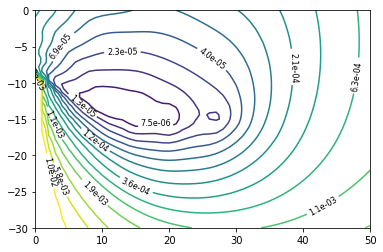

In [12]:
gammaR = torch.linspace(0,50,51)
gammaI = torch.linspace(-30,0,51)

M = magnus(t[0],len(v),dt,dx)
# vds = Krylov.resample.downsample1D(v,251,[-240,240])

# M = magnus(t[0],501,dt,2*dx)
# vds = Krylov.resample.downsample1D(v,501,[-240,240])

# M = magnus(t[0],len(v),dt,dx)
# vds = v

loss = Sweep(gammaR,gammaI,M,v,1,dx,m,"defect")
torch.save(loss,"Linear/Results/def_contour.pt")
Contour(gammaR,gammaI,loss,FileName="Linear/Results/def_contour.tex")

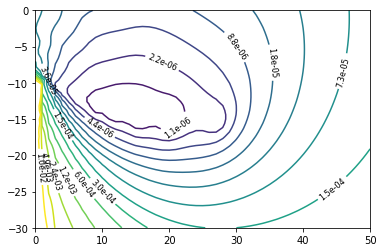

In [11]:

torch.save(loss,"Linear/Results/l2_contour.pt")
Contour(gammaR,gammaI,loss,FileName="Linear/Results/l2_contour.tex")

In [7]:
#Contour plot
def Contour(gammaR,gammaI,loss,shifts = [0],randshifts = [0],optshift = [0],FileName = "Test.tex"):
    hold = torch.nan_to_num(loss,nan=1e0)
    # if torch.log10(torch.max(hold)) < -2:
    levels = torch.logspace(torch.log10(torch.max(torch.tensor([torch.min(hold),1e-8]))),min(-2,torch.log10(torch.max(hold))),15)
    # else:
    #     levels = torch.logspace(torch.floor(torch.log10(torch.min(hold))),torch.ceil(torch.log10(torch.max(hold))),int(1+torch.ceil(torch.log10(torch.max(hold)))-torch.floor(torch.log10(torch.min(hold)))))
    cont = plt.contour(gammaR,gammaI,loss,levels,norm=LogNorm())
    fmt = '%1.1e'  # Exponential format
    plt.clabel(cont, inline=True, fontsize=8, fmt=fmt, colors='black', manual=False, inline_spacing=3)
    # plt.title("Rayleigh")
    if optshift != [0]:
        marker = ['o','s']
        for i in range(len(optshift)):
            plt.plot(optshift[i].real,optshift[i].imag,marker = marker[i],color = 'k')
    if randshifts != [0]:
        plt.plot(randshifts.real,randshifts.imag,'^',color = [0,0.2,0.8])
    if shifts != [0]:
        col = [1,0.1,0.2]#],[0,0.6,0.1]
        for i in range(len(shifts)):
            plt.plot(shifts[i].real,shifts[i].imag,'x',color = 'r')
            # for j in range (len(shifts[i])+1):
        for i in range(len(shifts)-1):
            plt.arrow(shifts[i].real,shifts[i].imag,shifts[i+1].real - shifts[i].real,shifts[i+1].imag - shifts[i].imag,linestyle = (3,(3,6)),color = 'k',head_length = 0)
    tikz.save(FileName)


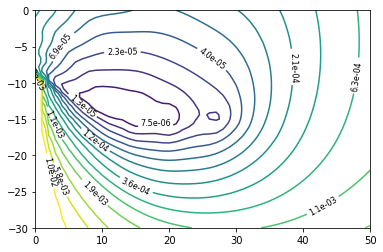

In [43]:
loss = torch.load("Linear/Results/Parameter_sweeps/sweep_N1001.pt")

Contour(gammaR,gammaI,loss,FileName="sweep_N501.tex")

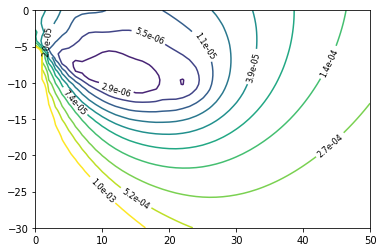

In [48]:
#Defect N = 1001
Contour(gammaR,gammaI,loss)

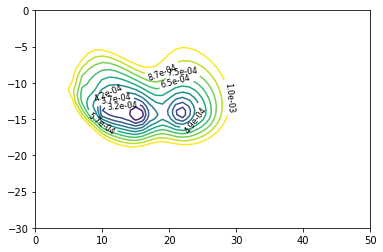

In [53]:
#Defect N = 501
Contour(gammaR,gammaI,loss,FileName = "Def_N501.tex")

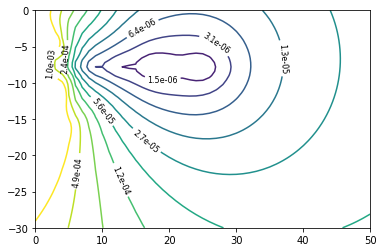

In [55]:
#Defect N = 251
Contour(gammaR,gammaI,loss,FileName = "Def_N251.tex")

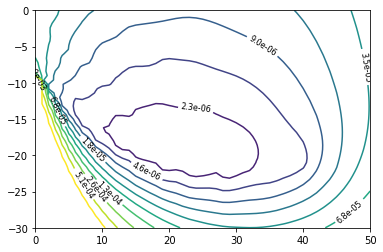

In [27]:
#RQ defect N=1001
Contour(gammaR,gammaI,loss,FileName="RQ_def_N1001.tex")

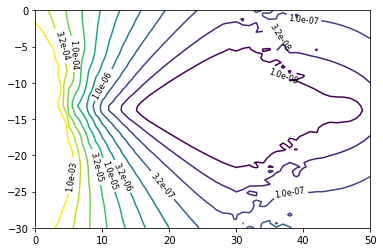

In [25]:
#RQ defect N=251
Contour(gammaR,gammaI,loss,FileName="RQ_def_N251.tex")

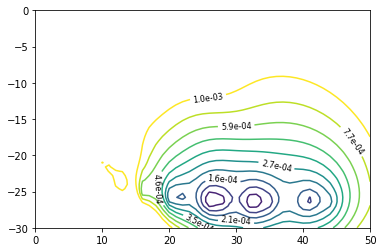

In [48]:
#RQ defect N=501
Contour(gammaR,gammaI,loss,FileName="RQ_def_N501.tex")

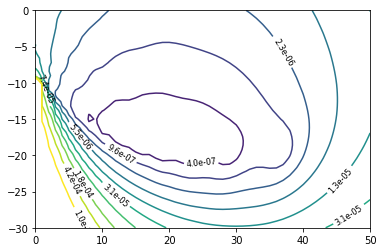

In [14]:
#RQ L2 Contour
Contour(gammaR,gammaI,loss,FileName="RQ_l2_contour.tex")

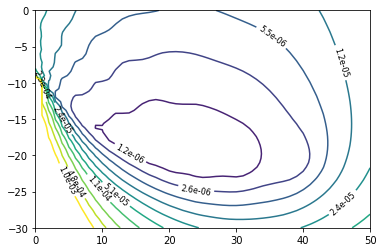

In [9]:
#RQ defect contour scipy
Contour(gammaR,gammaI,loss,FileName="RQ_def_contour_scipy.tex")

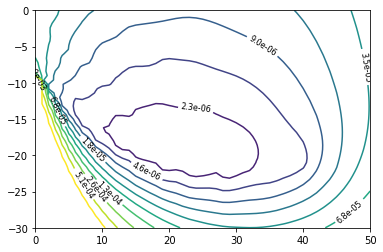

In [9]:
#RQ defect contour 10pt
Contour(gammaR,gammaI,loss,FileName="RQ_def_contour_10pt.tex")

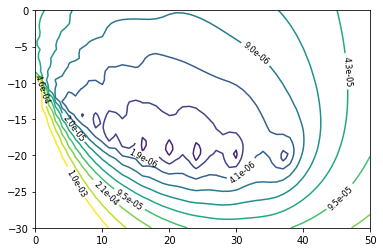

In [9]:
#RQ defect contour 3pt
Contour(gammaR,gammaI,loss,FileName="RQ_def_contour_3pt.tex")

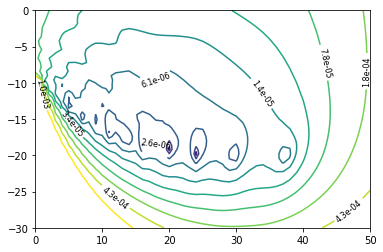

In [9]:
#RQ defect contour 1pt
Contour(gammaR,gammaI,loss,FileName="RQ_def_contour_1pt.tex")

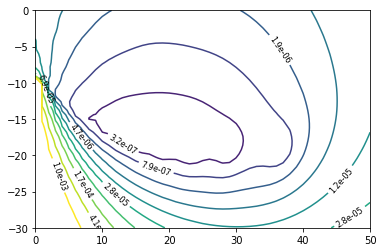

In [9]:
#SI L2 Contour
Contour(gammaR,gammaI,loss,FileName="SI_l2_contour.tex")

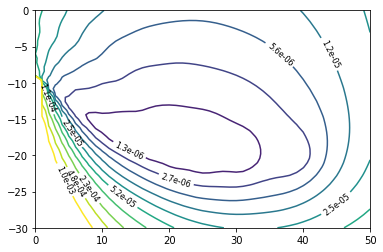

In [9]:
#SI defect contour scipy
Contour(gammaR,gammaI,loss,FileName="SI_def_contour_scipy.tex")

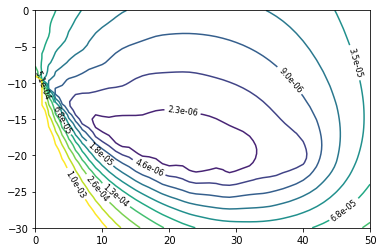

In [9]:
#SI defect contour 10pt
Contour(gammaR,gammaI,loss,FileName="SI_def_contour_10pt.tex")

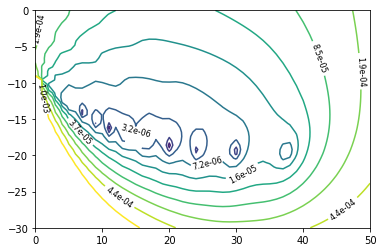

In [9]:
#SI defect contour 3pt
Contour(gammaR,gammaI,loss,FileName="SI_def_contour_3pt.tex")

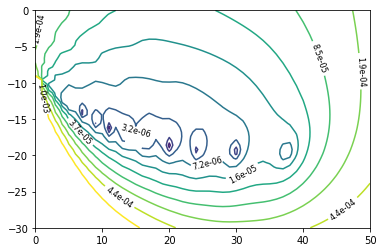

In [9]:
#SI defect contour 1pt
Contour(gammaR,gammaI,loss,FileName="SI_def_contour_1pt.tex")

In [36]:
#Functions for time-dependent potential and laplacian
def D2(dx,N):
    K2 = torch.tensor((torch.diag(torch.ones(N-1,),-1)+torch.diag(-2*torch.ones(N,))+torch.diag(torch.ones(N-1,),1))*(dx**-2),dtype=torch.complex128)
    return K2

def V(t):
    return torch.diag(V0 + e(t)*x)


In [123]:
#Fine Grid Optimisation
def Time_Int(v,m,dx,dt,t,coarse_N,ftol,glo_ref):
    # true_shifts = torch.load("Figures/Shift_Optimiser_Plots/Schrodinger/Time_Independent_Hamiltonian/Coarse_Grid/Optimiser/Coarse_Coulomb_OptPath.pt")
    print('t = {0:^4.2f}'.format(t[0]),end='\n')
    # coarse_dx = dx*(len(v)-1)/(coarse_N-1)
    # coarse_Magnus = magnus(t,coarse_N,dt,coarse_dx)
    # coarse_v = Krylov.Optimise.interpv(v,coarse_N,[-240,240])
    M = magnus(t[0],len(v),dt,dx)
    options = {'iprint':0,
           'maxiter':1000,
           'disp': True,
           'gtol':1e-15,
           'ftol':1e-15}

    Pot_energy = torch.tensor([Krylov.L2.IP(v,V(t[0]) @ v,dx).real])
    Kin_energy = torch.tensor([Krylov.L2.IP(v,-D2(dx,len(v))@v,dx).real])
    Tot_energy = torch.tensor([Pot_energy + Kin_energy])
    Num_sols = torch.reshape(v,[len(v),1])
    
    true_shifts,true_loss,rawshifts,obj_loss,randgammas = Krylov.Optimise.Optimise(A = M,
                                                                    v = v,
                                                                    dx = dx,
                                                                    m = m,
                                                                    true_dt=1,
                                                                    coarse_dt=1,
                                                                    coarse_N=len(v),
                                                                    options=options,
                                                                    tol = ftol,
                                                                    print_output=True,
                                                                    return_loss=True,
                                                                    rand_n=30,
                                                                    # # x0 = [4.7673,-25.9358],
                                                                    x0 = [18.477340,-15.298254],
                                                                    rand_bounds=[[0,50],[-50,0]],
                                                                    bounds = [(0,50),(-50,0)],
                                                                    loss_fn = "l2")
    torch.save(randgammas,"Linear/optimisation/randshifts.pt")
    torch.save(true_shifts,"Linear/optimisation/optpath.pt")
    torch.save(obj_loss,"Linear/optimisation/objloss.pt")
    # for i in range (len(true_shifts)):
    #     true_loss[i] = Krylov.Optimise.loss(magnus,v,1,dx,m,[true_shifts[i].real,true_shifts[i].imag],"l2")
    torch.save(true_loss,"Linear/optimisation/trueloss.pt")
    X = torch.linalg.inv(M - true_shifts[-1]*torch.eye(len(v)))
    Vm,Hm,beta = Krylov.Arnoldi.Polynomial(X,v,m,dx)
    # Am = Krylov.Solution.Rayleigh_Quotient(M,Vm,Hm,true_shifts[-1],dx)
    Am = true_shifts[-1]*torch.eye(m) + torch.linalg.inv(Hm[0:-1,0:-1])
    Est = Krylov.Solution.Polynomial(Vm[:,0:-1],Am,1,beta,torch.matrix_exp)
    Ref = torch.matrix_exp(M) @ v
    objective = torch.tensor([obj_loss[-1]])
    opt_shifts_t = torch.tensor([true_shifts[-1]])
    N_iter = torch.tensor([len(true_shifts)-1])
    Glo_error = torch.tensor([Krylov.L2.Error(Est,glo_ref[:,10],dx)])
    Loc_error = torch.tensor([Krylov.L2.Error(Est,Ref,dx)])
    # print(Loc_error)
    Pot_energy = torch.cat((Pot_energy,torch.tensor([Krylov.L2.IP(Est,V(t[1]) @ Est,dx).real])))
    Kin_energy = torch.cat((Kin_energy,torch.tensor([Krylov.L2.IP(Est,-D2(dx,len(v))@Est,dx).real])))
    Tot_energy = torch.cat((Tot_energy,torch.tensor([Pot_energy[-1] + Kin_energy[-1]])))
    Num_sols = torch.cat((Num_sols,torch.reshape(Est,[len(Est),1])),dim=1)

    for i in range (1,len(t)-1):
        print('t = {0:^4.2f}'.format(t[i]),end='\n')
        M = magnus(t[i],len(v),dt,dx)
        # coarse_Magnus = magnus(t,coarse_N,dt,coarse_dx)
        # coarse_v = Krylov.Optimise.interpv(Est,coarse_N,[-240,240])
        true_shifts,true_loss,rawshifts,obj_loss,randgammas = Krylov.Optimise.Optimise(A = M,
                                                                    v = Est,
                                                                    dx = dx,
                                                                    m = m,
                                                                    true_dt=1,
                                                                    coarse_dt=1,
                                                                    coarse_N=len(v),
                                                                    options=options,
                                                                    tol = ftol,
                                                                    print_output=True,
                                                                    return_loss=False,
                                                                    x0 = [true_shifts[-1].real,true_shifts[-1].imag],
                                                                    #bounds=[(0,100),(-100,0)],
                                                                    bounds = [(0,50),(-50,0)],
                                                                    loss_fn = "l2")
        
    
        objective = torch.cat((objective,torch.tensor([obj_loss[-1]])))
        opt_shifts_t = torch.cat((opt_shifts_t,torch.tensor([true_shifts[-1]])))
        N_iter = torch.cat((N_iter,torch.tensor([len(true_shifts)-1])))
        Ref = torch.matrix_exp(M) @ Est
        X = torch.linalg.inv(M - true_shifts[-1]*torch.eye(len(v)))
        Vm,Hm,beta = Krylov.Arnoldi.Polynomial(X,Est,m,dx)
        # Am = Krylov.Solution.Rayleigh_Quotient(M,Vm,Hm,true_shifts[-1],dx)
        Am = true_shifts[-1]*torch.eye(m) + torch.linalg.inv(Hm[0:-1,0:-1])
        Est = Krylov.Solution.Polynomial(Vm[:,0:-1],Am,1,beta,torch.matrix_exp)

        Pot_energy = torch.cat((Pot_energy,torch.tensor([Krylov.L2.IP(Est,V(t[i+1]) @ Est,dx).real])))
        Kin_energy = torch.cat((Kin_energy,torch.tensor([Krylov.L2.IP(Est,-D2(dx,len(v))@Est,dx).real])))
        Tot_energy = torch.cat((Tot_energy,torch.tensor([Pot_energy[-1] + Kin_energy[-1]])))
        Num_sols = torch.cat((Num_sols,torch.reshape(Est,[len(Est),1])),dim=1)
        Glo_error = torch.cat((Glo_error,torch.tensor([Krylov.L2.Error(Est,glo_ref[:,10*(i+1)],dx)])))
        Loc_error = torch.cat((Loc_error,torch.tensor([Krylov.L2.Error(Est,Ref,dx)])))
    return Pot_energy,Kin_energy,Tot_energy,opt_shifts_t,N_iter,Num_sols,Loc_error,Glo_error,objective
    
# ftol = 1e-6
# Pot_energy,Kin_energy,Tot_energy,opt_shifts_t,N_iter,Num_sols,Loc_error,Glo_error,objective = Time_Int(v,m,dx,dt,t,len(v),ftol,glo_ref)


In [119]:
#Coarse Grid Optimisation
def Time_Int(v,m,dx,dt,t,coarse_N,ftol,glo_ref):
    # true_shifts = torch.load("Linear/Fine_Grid/time_integration/Optimiser_Shifts.pt")
    print('t = {0:^4.2f}'.format(t[0]),end='\n')
    coarse_dx = dx*(len(v)-1)/(coarse_N-1)
    coarse_Magnus = magnus(t[0],coarse_N,dt,coarse_dx)
    coarse_v = Krylov.Optimise.interpv(v,coarse_N,[-240,240])
    M = magnus(t[0],len(v),dt,dx)
    options = {'iprint':0,
           'maxiter':1000,
           'disp': True,
           'gtol':1e-15,
           'ftol':1e-15}

    Pot_energy = torch.tensor([Krylov.L2.IP(v,V(t[0]) @ v,dx).real])
    Kin_energy = torch.tensor([Krylov.L2.IP(v,-D2(dx,len(v))@v,dx).real])
    Tot_energy = torch.tensor([Pot_energy + Kin_energy])
    Num_sols = torch.reshape(v,[len(v),1])
    
    true_shifts,true_loss,rawshifts,obj_loss,randgammas = Krylov.Optimise.Optimise(A =coarse_Magnus,
                                                                    v = coarse_v,
                                                                    dx = coarse_dx,
                                                                    m = m,
                                                                    true_dt=1,
                                                                    coarse_dt=1,
                                                                    coarse_N=coarse_N,
                                                                    options=options,
                                                                    tol = ftol,
                                                                    print_output=True,
                                                                    return_loss=True,
                                                                    rand_n=30,
                                                                    # x0 = [4.7673,-25.9358],
                                                                    # x0 = [18.477340,-15.298254],
                                                                    rand_bounds=[[0,50],[-50,0]],
                                                                    bounds = [(0,50),(-50,0)],
                                                                    loss_fn = "l2")
    torch.save(randgammas,"Linear/optimisation/randshifts.pt")
    torch.save(true_shifts,"Linear/optimisation/optpath.pt")
    torch.save(obj_loss,"Linear/optimisation/objloss.pt")
    for i in range (len(true_shifts)):
        true_loss[i] = Krylov.Optimise.loss(M,v,1,dx,m,[true_shifts[i].real,true_shifts[i].imag],"l2")
    torch.save(true_loss,"Linear/optimisation/trueloss.pt")
    X = torch.linalg.inv(M - true_shifts[-1]*torch.eye(len(v)))
    Vm,Hm,beta = Krylov.Arnoldi.Polynomial(X,v,m,dx)
    # Am = Krylov.Solution.Rayleigh_Quotient(M,Vm,Hm,true_shifts[-1],dx)
    Am = true_shifts[-1]*torch.eye(m) + torch.linalg.inv(Hm[0:-1,0:-1])
    Est = Krylov.Solution.Polynomial(Vm[:,0:-1],Am,1,beta,torch.matrix_exp)
    Ref = torch.matrix_exp(M) @ v
    objective = torch.tensor([obj_loss[-1]])
    opt_shifts_t = torch.tensor([true_shifts[-1]])
    N_iter = torch.tensor([len(true_shifts)-1])
    Glo_error = torch.tensor([Krylov.L2.Error(Est,glo_ref[:,10],dx)])
    Loc_error = torch.tensor([Krylov.L2.Error(Est,Ref,dx)])
    # print(Loc_error)
    Pot_energy = torch.cat((Pot_energy,torch.tensor([Krylov.L2.IP(Est,V(t[1]) @ Est,dx).real])))
    Kin_energy = torch.cat((Kin_energy,torch.tensor([Krylov.L2.IP(Est,-D2(dx,len(v))@Est,dx).real])))
    Tot_energy = torch.cat((Tot_energy,torch.tensor([Pot_energy[-1] + Kin_energy[-1]])))
    Num_sols = torch.cat((Num_sols,torch.reshape(Est,[len(Est),1])),dim=1)

    for i in range (1,len(t)-1):
        print('t = {0:^4.2f}'.format(t[i]),end='\n')
        M = magnus(t[i],len(v),dt,dx)
        coarse_Magnus = magnus(t[i],coarse_N,dt,coarse_dx)
        coarse_v = Krylov.Optimise.interpv(Est,coarse_N,[-240,240])
        true_shifts,true_loss,rawshifts,obj_loss,randgammas = Krylov.Optimise.Optimise(A = coarse_Magnus,
                                                                    v = coarse_v,
                                                                    dx = coarse_dx,
                                                                    m = m,
                                                                    true_dt=1,
                                                                    coarse_dt=1,
                                                                    coarse_N=coarse_N,
                                                                    options=options,
                                                                    tol = ftol,
                                                                    print_output=True,
                                                                    return_loss=False,
                                                                    x0 = [true_shifts[-1].real,true_shifts[-1].imag],
                                                                    #bounds=[(0,100),(-100,0)],
                                                                    bounds = [(0,50),(-50,0)],
                                                                    loss_fn = "l2")
        
    
        objective = torch.cat((objective,torch.tensor([obj_loss[-1]])))
        opt_shifts_t = torch.cat((opt_shifts_t,torch.tensor([true_shifts[-1]])))
        N_iter = torch.cat((N_iter,torch.tensor([len(true_shifts)-1])))
        Ref = torch.matrix_exp(M) @ Est
        X = torch.linalg.inv(M - true_shifts[-1]*torch.eye(len(v)))
        Vm,Hm,beta = Krylov.Arnoldi.Polynomial(X,Est,m,dx)
        # Am = Krylov.Solution.Rayleigh_Quotient(M,Vm,Hm,true_shifts[-1],dx)
        Am = true_shifts[-1]*torch.eye(m) + torch.linalg.inv(Hm[0:-1,0:-1])
        Est = Krylov.Solution.Polynomial(Vm[:,0:-1],Am,1,beta,torch.matrix_exp)
        # Est = Krylov.Solution.Shift_Invert(Vm,Hm,1,beta,true_shifts[-1],torch.matrix_exp)
        # Est = Krylov.Solution.Rayleigh(Vm,A,dt,dx,beta,torch.matrix_exp)
        Pot_energy = torch.cat((Pot_energy,torch.tensor([Krylov.L2.IP(Est,V(t[i+1]) @ Est,dx).real])))
        Kin_energy = torch.cat((Kin_energy,torch.tensor([Krylov.L2.IP(Est,-D2(dx,len(v))@Est,dx).real])))
        Tot_energy = torch.cat((Tot_energy,torch.tensor([Pot_energy[-1] + Kin_energy[-1]])))
        Num_sols = torch.cat((Num_sols,torch.reshape(Est,[len(Est),1])),dim=1)
        Glo_error = torch.cat((Glo_error,torch.tensor([Krylov.L2.Error(Est,glo_ref[:,10*(i+1)],dx)])))
        Loc_error = torch.cat((Loc_error,torch.tensor([Krylov.L2.Error(Est,Ref,dx)])))
    return Pot_energy,Kin_energy,Tot_energy,opt_shifts_t,N_iter,Num_sols,Loc_error,Glo_error,objective
    
# ftol = 1e-6
# Pot_energy,Kin_energy,Tot_energy,opt_shifts_t,N_iter,Num_sols,Loc_error,Glo_error,objective = Time_Int(v,m,dx,dt,t,len(v),ftol,glo_ref)


In [125]:
# ftol = 3.5e-4
ftol = 1e-12
Pot_energy,Kin_energy,Tot_energy,opt_shifts_t,N_iter,Num_sols,Loc_error,Glo_error,objective = Time_Int(v,m,dx,dt,t,int((len(v)-1)/1)+1,ftol,glo_ref)


t = 0.00


C:\Users\mt767\AppData\Local\Temp\ipykernel_18124\337920048.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(dt* e(dt/2 * roots + t+dt/2).dot(weights)/(2*dt))
C:\Users\mt767\AppData\Local\Temp\ipykernel_18124\337920048.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(dt*sfunc(dt/2 * roots + dt/2).dot(weights))
C:\Users\mt767\AppData\Local\Temp\ipykernel_18124\1992140335.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  K2 = torch.tensor((torch.diag(torch.ones(N-1,),-1)+torch.diag(-2*torch.

   0    18.477340-15.298254j    8.43e-07
   1    18.477340-15.298254j    8.43e-07
t = 10.00
   0    18.477340-15.298254j    1.07e-06
   1    18.477340-15.298254j    1.07e-06
   2    18.479505-15.104359j    9.87e-07
   3    18.646658-14.228261j    7.60e-07
   4    18.863974-13.904566j    7.20e-07
   5    19.080158-13.795852j    7.07e-07
   6    19.212598-13.833251j    7.03e-07
   7    19.247852-13.916681j    7.02e-07
   8    19.229229-13.940196j    7.02e-07
   9    19.226367-13.946698j    7.02e-07
  10    19.228169-13.944896j    7.02e-07
  11    19.228169-13.944896j    7.02e-07
t = 20.00
   0    19.228169-13.944896j    7.64e-07
   1    19.228169-13.944896j    7.64e-07
t = 30.00
   0    19.228169-13.944896j    7.97e-07
   1    19.228169-13.944896j    7.97e-07
t = 40.00
   0    19.228169-13.944896j    8.02e-07
   1    19.228169-13.944896j    8.02e-07
t = 50.00
   0    19.228169-13.944896j    8.32e-07
   1    19.228169-13.944896j    8.32e-07
t = 60.00
   0    19.228169-13.944896j    8.70e-

In [228]:
optpath = torch.load("Linear/Fine_Grid/optimisation/optpath.pt")
optpath[0]

tensor(4.7673-25.9358j, dtype=torch.complex128)

In [128]:
#Save optimiser outputs
torch.save(Pot_energy,"Linear/time_integration/Potential_Energy.pt")
torch.save(Kin_energy,"Linear/time_integration/Kinetic_Energy.pt")
torch.save(Tot_energy,"Linear/time_integration/Total_Energy.pt")
torch.save(opt_shifts_t,"Linear/time_integration/Optimiser_Shifts.pt")
torch.save(N_iter,"Linear/time_integration/No_Iterations.pt")
torch.save(Num_sols,"Linear/time_integration/Numerical_Solution.pt")
torch.save(Loc_error,"Linear/time_integration/Local_Error.pt")
torch.save(Glo_error,"Linear/time_integration/Global_Error.pt")
torch.save(objective,"Linear/time_integration/Defect_Error.pt")
torch.save(ftol,"Linear/time_integration/ftol.pt")


In [70]:
#Load optimiser outputs
ftol = torch.load("Linear/Results/coarse_grid/SI_opt_SI_prop/ftol.pt")
Pot_energy = torch.load("Linear/Results/coarse_grid/SI_opt_SI_prop/Potential_Energy.pt")
Kin_energy = torch.load("Linear/Results/coarse_grid/SI_opt_SI_prop/Kinetic_Energy.pt")
Tot_energy = torch.load("Linear/Results/coarse_grid/SI_opt_SI_prop/Total_Energy.pt")
opt_shifts_t = torch.load("Linear/Results/coarse_grid/SI_opt_SI_prop/Optimiser_Shifts.pt")
N_iter = torch.load("Linear/Results/coarse_grid/SI_opt_SI_prop/No_Iterations.pt")
Num_sols = torch.load("Linear/Results/coarse_grid/SI_opt_SI_prop/Numerical_Solution.pt")
Loc_error = torch.load("Linear/Results/coarse_grid/SI_opt_SI_prop/Local_Error.pt")
Glo_error = torch.load("Linear/Results/coarse_grid/SI_opt_SI_prop/Global_Error.pt")
objective = torch.load("Linear/Results/coarse_grid/SI_opt_SI_prop/Defect_Error.pt")
randgammas = torch.load("Linear/Results/coarse_grid/SI_opt_SI_prop/randshifts.pt")
true_shifts = torch.load("Linear/Results/coarse_grid/SI_opt_SI_prop/optpath.pt")
obj_loss = torch.load("Linear/Results/coarse_grid/SI_opt_SI_prop/objloss.pt")
true_loss = torch.load("Linear/Results/coarse_grid/SI_opt_SI_prop/trueloss.pt")

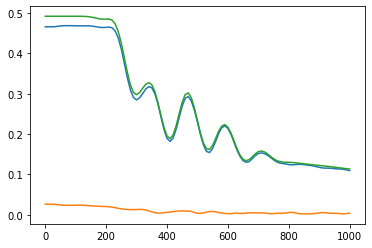

In [24]:
#Plot Energy
plotenergy(t,Pot_energy,Kin_energy,Tot_energy,FileName="FG_Energy.tex")

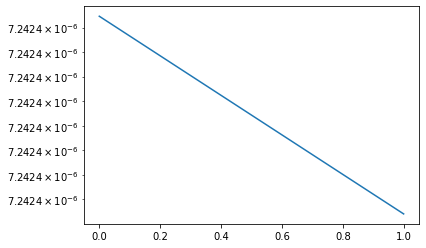

In [25]:
#Plot optimiser objective
plotoptimisation(obj_loss,"OptResidual.tex")

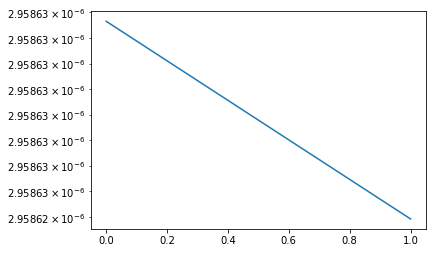

In [46]:
#Plot optimiser true error
plotoptimisation(true_loss,"OptTrueloss.tex")

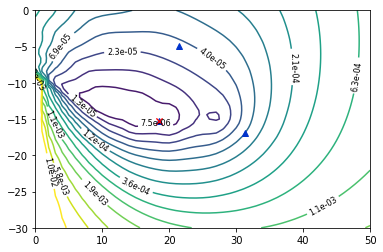

In [44]:
#Contour Plot of objective
Contour(gammaR,gammaI,loss,true_shifts,randgammas,FileName="FG_randshifts_contour.tex")

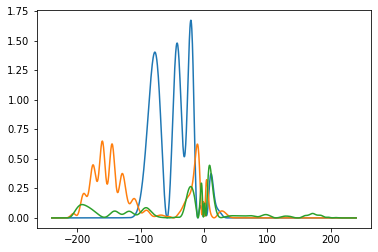

In [55]:
#Plot Wavefunction
plotwavefunction(x,13*Num_sols,[0,40,100],FileName="FG_wavefunction.tex")

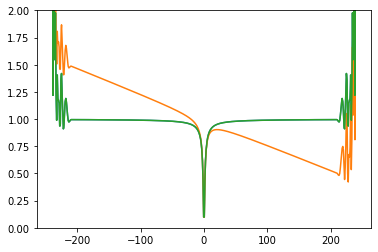

In [41]:
#Plot Potential
plotpotential(x,V,[t[0],t[47],t[100]],FileName="FG_potentials.tex")

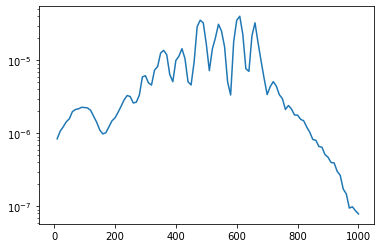

In [71]:
#Plot local error
ploterror(t,Loc_error,"CG_Locerr.tex")

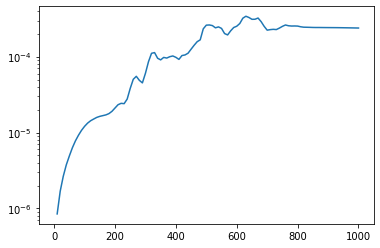

In [72]:
#Plot global error
ploterror(t,Glo_error,"CG_GloErr.tex")

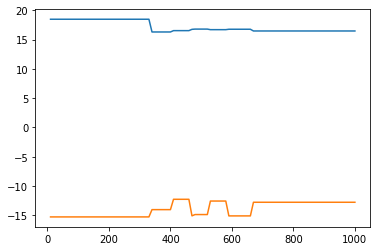

In [73]:
#Plot Shifts
plotshifts(t,opt_shifts_t,FileName="CG_shifts.tex")

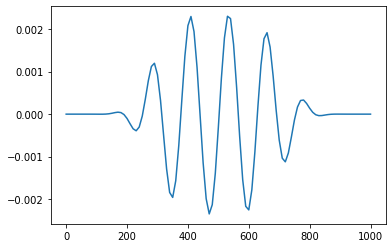

In [46]:
#Plot pulse
plotpulse(t,FileName="CG_pulse.tex")

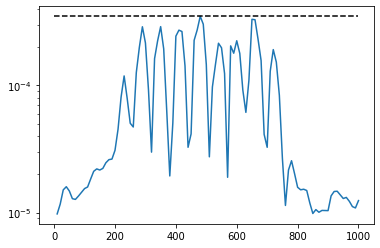

In [74]:
#Plot objective
ploterror(t,objective,"CG_Residual.tex",tol=ftol)

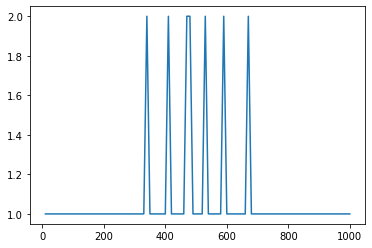

In [75]:
#Plot iterations
plotiterations(t,N_iter,FileName="CG_iterations.tex")

In [99]:
#Polynomial Krylov global error function
def Polynomial(v,m,t,dx,Ref):
    loss = torch.zeros((len(t)-1,))
    Est = v
    h = int(t[1]-t[0])
    for i in range (len(t)-1):
        M = magnus(t[i],len(v),t[1]-t[0],dx)
        Vm,Hm,beta = Krylov.Arnoldi.Polynomial(M,Est,m,dx)
        Est = Krylov.Solution.Polynomial(Vm[:,0:-1],Hm[0:-1,0:-1],1,beta,torch.matrix_exp)
        loss[i] = Krylov.L2.Error(Est,Ref[:,h*(i+1)],dx)
        print("t=",t[i+1],end = '\r')
    return loss

C:\Users\mt767\AppData\Local\Temp\ipykernel_18124\337920048.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(dt* e(dt/2 * roots + t+dt/2).dot(weights)/(2*dt))
C:\Users\mt767\AppData\Local\Temp\ipykernel_18124\337920048.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(dt*sfunc(dt/2 * roots + dt/2).dot(weights))


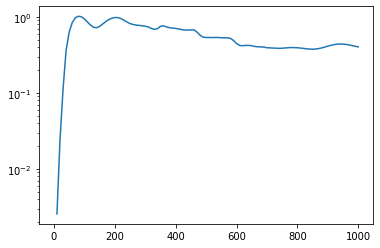

In [101]:
time = torch.linspace(t[0],t[-1],1*n+1)
glo_ref = torch.load("Linear/Results/Ref_Sol.pt")
polyerr = Polynomial(v,m,time,dx,glo_ref)
torch.save(polyerr,"Linear/Results/PolyKry_error_dtby1.pt")
ploterror(time,polyerr,"Poly_gloerr_dtby10.tex")

In [25]:
N = 250
dist = torch.distributions.normal.Normal(torch.zeros((N,)),torch.ones((N,)))
v = torch.tensor(dist.sample(),dtype = torch.complex128)
Ad0 = dist.sample()
Ad1 = dist.sample()
A = torch.diag(Ad0,0) + torch.diag(Ad1[0:-1],-1) - torch.diag(Ad1[0:-1],1)
A = torch.tensor(A - torch.transpose(torch.conj(A),0,1),dtype=torch.complex128)
dx = 1
gamma = 15
dt = 3e0
m = 20
X = torch.linalg.inv(A - gamma*torch.eye(len(v)))

Vm,Hm,beta = Krylov.Arnoldi.Polynomial(X,v,m,dx,1)

print(torch.max(torch.abs(Krylov.L2.IP(Vm[:,0:-1],Vm[:,0:-1],dx)-torch.eye(m))))

tensor(1.1102e-15, dtype=torch.float64)


C:\Users\mt767\AppData\Local\Temp\ipykernel_17772\3584551196.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  v = torch.tensor(dist.sample(),dtype = torch.complex128)
C:\Users\mt767\AppData\Local\Temp\ipykernel_17772\3584551196.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  A = torch.tensor(A - torch.transpose(torch.conj(A),0,1),dtype=torch.complex128)


In [26]:
em = torch.zeros((1,m),dtype = torch.complex128)
em[0,-1] = 1
e1 = torch.zeros((m,),dtype = torch.complex128)
e1[0] = 1

ymstar = em @ torch.linalg.inv(Hm[0:-1,0:-1])
ym = torch.transpose(torch.conj(ymstar),0,1)
ym = torch.reshape(ym,(ym.shape[0],))

kappa = Krylov.L2.IP(Vm[:,-1],A@Vm[:,-1],dx)

c = Hm[-1,-2]*(kappa + np.conj(gamma))



In [27]:
Am = Krylov.Solution.Rayleigh_Quotient(A,Vm,Hm,gamma,dx)
# Am = torch.linalg.inv(Hm[0:-1,0:-1]) + gamma * torch.eye(m)
Est = Krylov.Solution.Polynomial(Vm[:,0:-1],Am,dt,beta,torch.matrix_exp)
Ref = Krylov.Solution.Exact(A,v,dt,torch.matrix_exp)
print(Krylov.L2.Error(Est,Ref,dx))

tensor([0.0008+0.j], dtype=torch.complex128)


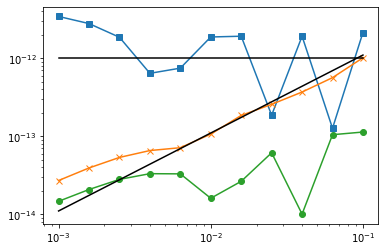

In [45]:
h = torch.logspace(-3,-1,11)
defect = torch.zeros((len(h),))
error = torch.zeros((len(h),))
integ = torch.zeros((len(h),))

def integrand(s):
    return torch.abs(ymstar @ torch.matrix_exp(s*Am)@e1)

for i in range (len(h)):
    defect[i] = Krylov.Optimise.loss(A,v,h[i],dx,m,[gamma,0],"defect")
    error[i] = Krylov.Optimise.loss(A,v,h[i],dx,m,[gamma,0],"l2")
    integ[i] = integrand(h[i])

plt.plot(h,integ,'-s')
plt.plot(h,defect,'-x')
plt.plot(h,error,'-o')
plt.plot(h,1e-12*torch.ones((len(h),)),'k')
plt.plot(h,h*1.1e-11,'k')
plt.xscale('log')
plt.yscale('log')
tikz.save("deferr_v_dt.tex")